# Project: Forest Cover Type
## Supervised Learning, Classification

----
## Table of Contents

- [Description](#description)
- [Getting Started](#Getting-Started)
    - [Explaination of the Data](#Explaination-of-the-data)
- [Data Exploration](#Data-Exploration)
    - [Feature Statistics](#Feature-Statistics)
        - [Feature Describe](#Feature-Describe)
        - [Feature Skew](#Feature-Skew)
        - [Class Distribution](#Class-Distribution)
    - [Feature Visualization](#Feature-Visualization)
        - [Feature Spread](#Feature-Spread)
        - [Feature Distribution](#Feature-Distribution)
        - [Feature Comparison](#Feature-Comparison)
        - [Feature Correlation](#Feature-Correlation)       
- [Data Engineering](#Data-Engineering)
    - [Feature Cleaning](#Feature-Cleaning)
    - [Observation Cleaning](#Observation-Cleaning)
        - [Handling Missing Values](#Handling-Missing-Values)
        - [Handling-Duplicates](#Handling-Duplicates)
    - [Shuffling](#Shuffling)
    - [Train-Test Split](#Train-Test-Split)
    - [Feature Scaling](#Feature-Scaling)
- [Model Evaluations](#Model-Evaluations)
    - [Benchmark Model](#Benchmark-Model)
    - [KNN Performance](#KNN-Performance)
    - [RF Performance](#RF-Performance)
    - [SGDC Performance](#SGDC-Performance) 
    - [Choosing Model](#Choosing-Model)
- [Final Results](#Final-Results)
-----
-----

## Description

A short description I want to give of how I am going to solve this project before starting. Our goal in this project is to classify which forest type it is from the data given.

- This study area includes 4 Wilderness Areas located in the Roosevelt National Forest of Northern Colorado. These area represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological process rather than forest management practices.

- Each observation is 30m x 30m forest cover type determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from the data originally obtained from US Geological Survey (USGS) and USFS data.

- I have been given a total of 54 attributes/features, (excluding 1 target variable) these attributes contain Binary and Quantative attributes, and I need to predict which Forest Cover-Type is it from the given features.

- I will first explore the data, visualize it, know what the data wants to tell us. Remove any missing values and features that have null values and scale the data within a specific range.

- Split the data 75%-25%, train-test set respectively. Will use 10 K-fold Cross Validation on train set.

- Feed the training data to the Naive Bayes (Our Benchmark Model) and evaluate the result on the test set.

- Training will be done on the Solution Models that I have chose, those are:-
    - K-Nearest Neighbour (KNN), 
    - Random Forest (RF) and 
    - Stochastic Gradient Descent Classifier (SGDC)
    
    All these models will be boosted with Adaboost (Adaptive Boosting) boosting algorithm since we have uneven number of observation of classes in the target varaible.
 
- Scores will be evaluated with Accuracy, Precision, Recall and F1 score metrics.

- Choosing the best model from above based on metrics scores and testing that model on the test set.

- Conclusions

Detailed Info regarding the how I am going approach the problem and data summary is given in `proposal.pdf` file. [Visit](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf)

In [1]:
# Importing required libraries for the project
import sys # for python library version
import numpy as np # for scientific computing
import pandas as pd # for data anaysis
import matplotlib # for visualization
import seaborn as sns # for visualization
import sklearn # ML Library

In [ ]:
print('Python: {}'.format(sys.version))  # Python version
print('numpy: {}'.format(np.__version__))  # Numpy version
print('pandas: {}'.format(pd.__version__))  # Pandas version
print('matplotlib: {}'.format(matplotlib.__version__))  # Matplotlib version
print('seaborn: {}'.format(sns.__version__))  # seaborn version
print('sklearn: {}'.format(sklearn.__version__))  # sklearn version

In [2]:
# warning module
import warnings
# will ignore any warning from this category
warnings.filterwarnings("ignore", category=DeprecationWarning)

------
------

## Getting Started
First thing first, we need to import the dataset and have a peak at it....

In [3]:
# importing the dataset to a variable
data = pd.read_csv("covtype.data")

# displaying first 3 observations
data.head(3)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2


We can see that the data has been imported successfully but there are missing column names. We need to give column names in order to keep track of columns and make sense of features and data we have.

The column names are given here on [Kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset)

In [4]:
# since the data doesn't have column names, we will provide it in a form of list
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

# Feeding column names to the data
data.columns = feature_names

In [ ]:
# displaying first 5 observation
data.head(5)

Hmm, Now that makes sense. 
Now we need to know the number of observations and features we have.

In [ ]:
# dimensions of the data
# where x will be no. of observation
# and y will be features including 1 target variable
x, y = data.shape

print('We have ', x, ' number of observations and ', y-1, ' features for this dataset to predict type of forest cover.')  # removing count of a target variable in 'y'

Let's look at the datatypes of each feature and see if it needs any processing if the feature is not in its appropriate form..

In [ ]:
# datatypes of features
data.dtypes

Well since all are numeric integer and should be so, then we do not need to do any convertions here.

---------

### Explaination of the data

Our dataset has `54` features, from them `10` are `numeric` and `44` are `catrgorical`. From 44 categorical, `40` are of `Soil_Type` and `4` of `Wilderness_Area`.

We have been provided the names of all `Soil_Type` and `Wilderness_Areas` for this dataset. The table below lists all the names with respect to their feature names in the column:

This information is available on [kaggle](https://www.kaggle.com/uciml/forest-cover-type-dataset), [UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info) and in my [Proposal](https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/proposal.pdf), but for convenience and have documented here too.

| Feature Name | Names |
| ------------ | ----- |
| Wilderness_Area1 | Rawah Wilderness Area |
| Wilderness_Area2 | Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area |
| Wilderness_Area4 | Cache La Poudre Wilderness Area |
| Soil_Type1 | Cathedral family - Rock outcrop complex, extremely stony |
| Soil_Type2 | Vanet - Ratake families complex, very stony |
| Soil_Type3 | Haploborolis - Rock outcrop complex, rubbly |
| Soil_Type4 | Ratake family - Rock outcrop complex, rubbly |
| Soil_Type5 | Vanet family - Rock outcrop complex, rubbly |
| Soil_Type6 | Vanet - Wetmore families - Rock outcrop complex, stony |
| Soil_Type7 | Gothic family |
| Soil_Type8 | Supervisor - Limber families complex |
| Soil_Type9 | Troutville family, very stony |
| Soil_Type10 | Bullwark - Catamount families - Rock outcrop complex, rubbly |
| Soil_Type11 | Bullwark - Catamount families - Rock land complex, rubbly |
| Soil_Type12 | Legault family - Rock land complex, stony |
| Soil_Type13 | Catamount family - Rock land - Bullwark family complex, rubbly |
| Soil_Type14 | Pachic Argiborolis - Aquolis complex |
| Soil_Type15 | _unspecified in the USFS Soil and ELU Survey_ |
| Soil_Type16 | Cryaquolis - Cryoborolis complex |
| Soil_Type17 | Gateview family - Cryaquolis complex |
| Soil_Type18 | Rogert family, very stony |
| Soil_Type19 | Typic Cryaquolis - Borohemists complex |
| Soil_Type20 | Typic Cryaquepts - Typic Cryaquolls complex |
| Soil_Type21 | Typic Cryaquolls - Leighcan family, till substratum complex |
| Soil_Type22 | Leighcan family, till substratum, extremely bouldery |
| Soil_Type23 | Leighcan family, till substratum, - Typic Cryaquolls complex. |
| Soil_Type24 | Leighcan family, extremely stony |
| Soil_Type25 | Leighcan family, warm, extremely stony |
| Soil_Type26 | Granile - Catamount families complex, very stony |
| Soil_Type27 | Leighcan family, warm - Rock outcrop complex, extremely stony |
| Soil_Type28 | Leighcan family - Rock outcrop complex, extremely stony |
| Soil_Type29 | Como - Legault families complex, extremely stony |
| Soil_Type30 | Como family - Rock land - Legault family complex, extremely stony |
| Soil_Type31 | Leighcan - Catamount families complex, extremely stony |
| Soil_Type32 | Catamount family - Rock outcrop - Leighcan family complex, extremely stony |
| Soil_Type33 | Leighcan - Catamount families - Rock outcrop complex, extremely stony |
| Soil_Type34 | Cryorthents - Rock land complex, extremely stony |
| Soil_Type35 | Cryumbrepts - Rock outcrop - Cryaquepts complex |
| Soil_Type36 | Bross family - Rock land - Cryumbrepts complex, extremely stony |
| Soil_Type37 | Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony |
| Soil_Type38 | Leighcan - Moran families - Cryaquolls complex, extremely stony |
| Soil_Type39 | Moran family - Cryorthents - Leighcan family complex, extremely stony |
| Soil_Type40 | Moran family - Cryorthents - Rock land complex, extremely stony |


Yeah! I know! Sorry, I didn't get to pick names! But just given here for reference for curious people who might be wondering what type of Wilderness and Soil does the forest have. 

We will stick to the current feature names and not change it for ease! Later, if necessory, we might take a look at this if we see some feature catch our interests.

Just to clarify, the categorical variable we have here is 2. And these alone have 44 features. But an observation can only have presence of any 2 feature from 44, 1 for Soil and 1 for Wilderness. So if an observation has `'1'` in `Wilderness_Area4` and `'1'` in `Soil_Type12`, it means that it's respective Soil and Wilderness is present, while all other 42 features will have `'0'` hence its absence. And this is what a categorical feature means. And also these are `one-hot encoded` for us, so thanks to the authors!

Talking about numeric features, 2, `Aspect` and `Slope` have measurement in `degrees` while 3 `Hillshade..` features have values range from `0 to 255` index, descibing summer solstice. Remaining 5 out 10 numeric features have measurement in `Meters`. 

The target variable `Cover_Type` ranges bewtween integer value `1 - 7` and each number is a key reprsenting names of different forest type. Let's look at what number represents which forest cover types.

| Key | Name |
| --- | ---- |
| 1 | Spruce / Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood / Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |

We will later take a look how many observations are there for each class.

Now let's start exploring the data statistically...

-------
-------

## Data Exploration

### Feature Statistics

#### Feature Describe

In the data exploration section, we will split the data in 2 parts. First part will contain all numerical features and second part will contain all binary features of the data. The target variable `Cover_Type` is not included in any of it.

**We will look at the statistics of numerical features and extract useful info out of it.**

In [5]:
# Extracting all numerical features from data
num_fea = data.iloc[:, :10]

# extracting all binary features from data
binary_fea = data.iloc[:, 10:-1]


# statistics of numerical features
num_fea.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


- Mean of the feature vary from as low as 14 to as high as 2959.

- Standard deviation tells us how spread the data is from the mean, here we can see `Horizontal_Distance_To_Roadways` is the most spread out data followed by `Horizontal_Distance_To_Fire_Points` and `Elevation`. The most densed and near to mean is `Slope` followed by all 3 features of `Hillshade`. [Take a look at plot #1](#Feature-Visualization)

- All the features have minimum value of `0` except `Elevation` and `Vertical_Distance_To_Hydrology` features. Where `Elevation` has the highest minimum value and `Vertical_Distance_To_Hydrology` has the lowest, being negative.

- We can document here in detail for each feature of how spread or dense the data value is between min-25%, 25%-50%, 50%-75% and 75%--max. These are called the percentile. 25% percentile denotes first quaritle, 50% percentile is the median and 75% percentile is the third quartile. We will look in detail with the help of visualization to clearly understand it later in this project. [Take a look at plot #1](#Feature-Visualization)

- `Hillshade`s features have similar maximum value of `254` while `Horizontal_Distance_To_Fire_Points` has the highest followed by `Horizontal_Distance_To_Roadways` feature and they also have the highest ranges of all features. `Slope` having lowest maximum value and also being lowest in range followed by `Apsect` feature. 


The reason some features are so widely spread and having high values and some features don't is because 5 out of 10 variables are measured in meters, includes (`'Elevation', 'Horizontal_Distance_To_Hydrology' , Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', Horizontal_Distance_To_Fire_Points'`), so it makes sense that these have high values and ranges. Features like `Aspect` and `Slope` are measured in degrees so its maximum value can't go above 360. While `Hillshade`s features have can take on max value of 255. All these were discussed before.

To help understand this visually, [take a look at plot #1](#Feature-Visualization) and [take a look at plot #4.1](#Feature-Visualization)

**Taking statistical look at binary or categorical features.**

In [ ]:
# statistics of binary or categorical features
binary_fea.describe()

- Since here all the values can only be either 0 and 1. The mean can tell us useful information here. `Wilderness_Area1` has the highest mean followed by `Wilderness_Area3`, this means that `Wilderness_Area1` has the most presence in the data compared to other Wilderness Areas. In other words, most observation have features either `Wilderness_Area1` or `Wilderness_Area3`. The least amount of observation will be seen from `Wilderness_Area2`. We will visualize this and `Soil_Type` features later for better understanding these data in `Feature Visualization` section. [Take a look at plot #3](#Feature-Visualization)

- One more thing to notice here is that when we add all the mean of `Wildernesss_Area`s `0.448864 + 0.051434 + 0.436074 + 0.063627` we get result `0.999999` which is approximately `1`. This actually makes sense because all the observations can be from any one Wilderness area. I have programmed to check whether any obsevation has 2 Soil types at the same time or None for assurance that our data is in appropriate form. I will do this in `Data Engineering` section.

- Hence if we look at this in the probability perspective we can say that, the next observation that we get has `44.8%` probability that its been taken from `Wilderness_Area1`, `43.6%` probability that it's taken from `Wilderness_Area3` and so on for others. [Take a look at plot #2](#Feature-Visualization)

- We can document same for `Soil_Type`s too.  [Take a look at plot #3](#Feature-Visualization) and [plot #4.2](#Feature-Visualization)

By looking at these statistics of two different data types and since the features have different spreads and uneven amount of distribution, we will feature scale these so that all the feature have similar ranges between 0 and 1. Some algorithm are very sensitive to high values hence giving us inapprpraite results while some algorithms are not. Do be on safe side we will feature scale it and we will do this in `Data Engineering` Section.

#### Feature Skew

**Exploring Skewness of each features:**

In [ ]:
# skew distribution
data.skew()

- We can see that `Soil_Type15` has the highest positive skewness meaning the mass of the distribution is concentrated to the left and has long tail to the right. This is also called `right skewed distribution`. Where mode of the feature is to the left most followed by median and mean. [Take a look at plot #3](#Feature-Visualization)

- `Elevation` and `Hillshade`s having negatively skewed distibution is the opposite in appearance to the positively skewed where mode is to the right most followed by meadian and mean.

- ML algothims can be very sensitive to such ranges of data and can give us inappropriate or weak results. Feature Scaling will handle these as discussed earlier.

#### Class Distribution:

Let's take a look how each class is distributed..

In [ ]:
# grouping by forest cover type and calculating total occurance
data.groupby('Cover_Type').size()

- We have uneven samples of forest cover type, where `Lodgepole Pine (2)` has the highest no. of observation followed by `Spruce (1)`. Only these 2 cover types add up to `495,141` number of observations out of `581,011` total which covers approx `85.2%` of data.

- Feeding with such uneven distribution of data to an algorithm will not help them learn more about features like `Cottonwood (4)` and `Aspen (5)` where they have least amount of observation as strongly as features with high amount of observations hence making the algorithm weak learners giving low metrics scores. 

- To avoid this I will apply Adaboost boosting algorithm to our chosen models.

Enough of looking at bunch of numbers! Lets Visualize them...!

### Feature Visualization

#### Feature Spread

Visualizing the spread and outliers of the data of numerical features.

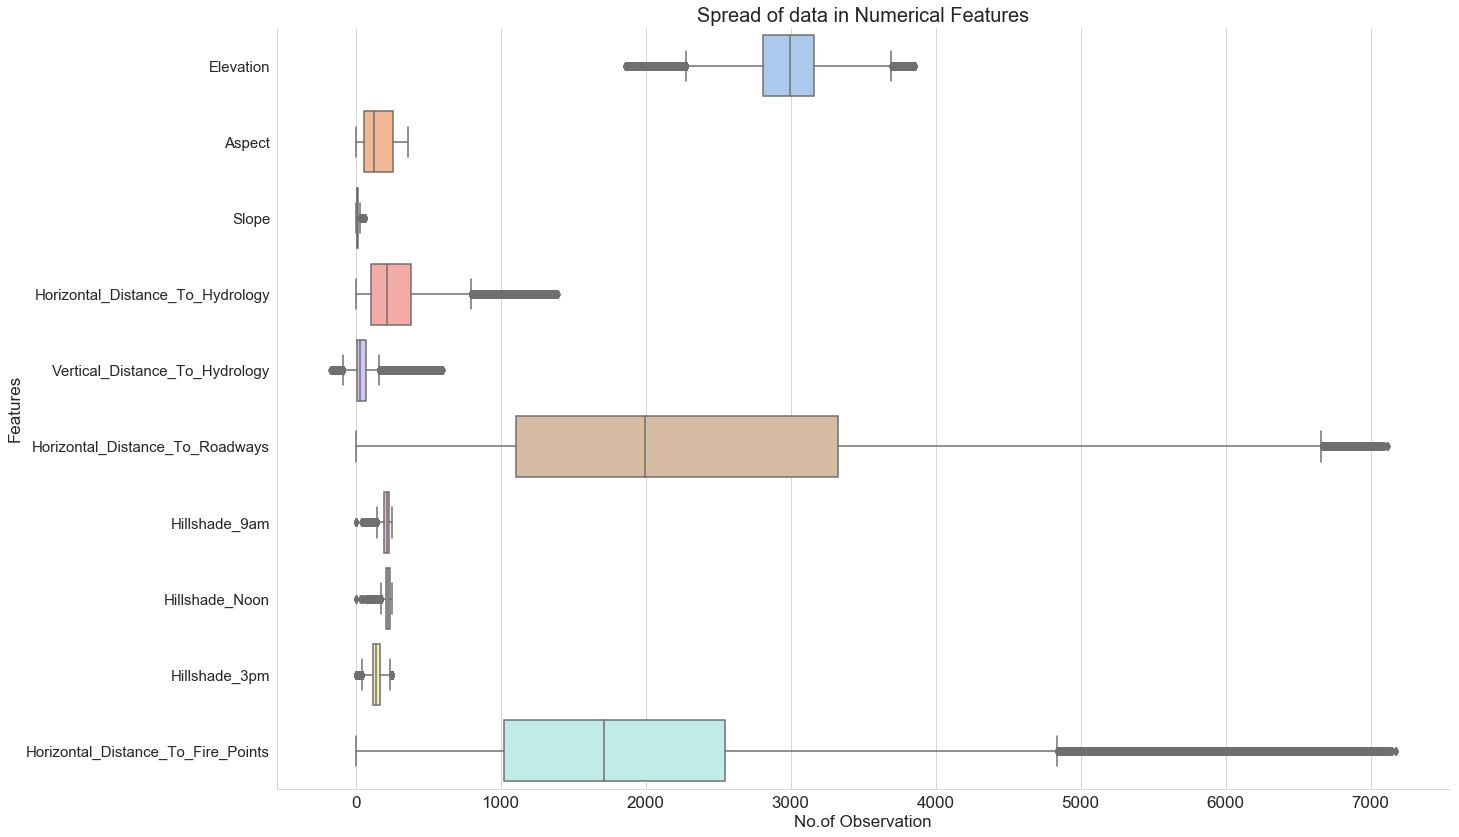

In [7]:
#####    1    ######
# Box and whiskers plot
# Spread of numerical features

# importing pyplot module from matplotlib to plt
plt = matplotlib.pyplot

# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = num_fea, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

- As explained by me in [feature statistics](#Feature-Statistics), `Slope` is the most squeezed box plot feature! It's densely packed taking on least range compared to all features. Having little range means `mean` and `median` will be quite close and we saw that before in the table, has a difference of approx 1. It does have a few outliers though.

- `Aspect` feature is the only one which do not have any outliers having a range of 360. Since both `Aspect` and `Slope` are measured in degrees, `Aspect` takes on much bigger range than `Slope` because it has lowest max score, hence `Aspect` is much less densed than `Slope`. The `first 50%` of the data, from `min to meadian` is more densed than the `last 50%`, its more spread out.

- `Hillshade`s feature also having similar plot like `Slope` including many outliers and taking on smaller range. Similiar plot is for `Vertical_Distance_To_Hydrology` except here the minimum value is negative as we had seen in the table.

- `Elevation` and `Horizontal_Distance_To_Hydrology` are the only features that doesn't have minimum value of 0. `Elevation` instead is plotted in middle having many outliers too.

- `Horizontal_Distance_To_Roadways` is the most spread data of all features because it has the highest standard deviation score followed by `Horizontal_Distance_To_Fire_Points` though this feature has the maximum value. We can see visually only how spread these are and which one is most. `Horizontal_Distance_To_Fire_Points` may be having largest number of outliers I guess from this plot. If we compare these two features, the last 50% of the data of `Horizontal_Distance_To_Roadways` is much more spread and less dense compared to `Horizontal_Distance_To_Fire_Points` , hence having high standard deviation score.

-------

#### Feature Distribution

Now, lets plot how `Wilderness_Area`s are distributed. As we saw earlier in [feature statistics](#Feature-Statistics), the mean of `Wilderness_Area1` and `Wilderness_Area3` were highest which meant there presence were high. Now lets see if thats the case, in visuals.

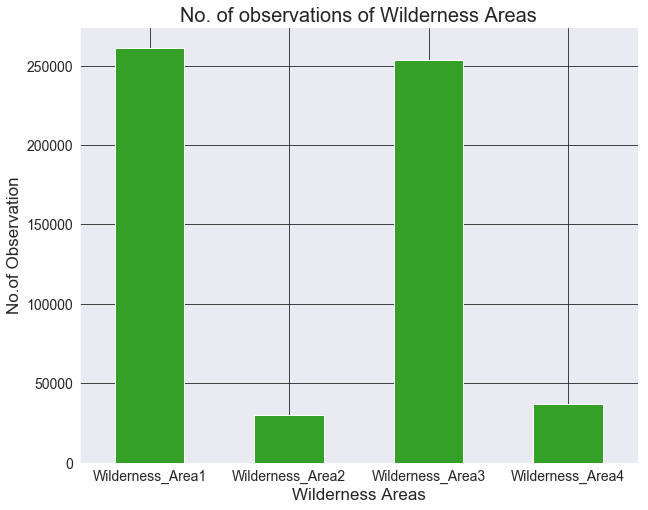

In [8]:
####    2    #####
# Bar plot
# Wilderness Area Count

# Splitting binary_fea data in 2
# Wild_data will have wilderness data
# Soil_Data will have Soil data

# Splitting
Wild_data, Soil_data = binary_fea.iloc[:,:4], binary_fea.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# list of colors
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
# using seaborn, passing color to palette
color = sns.color_palette(flatui)

# Sum the data, plot bar with given size using color defined
Wild_data.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

# Title of the graph
plt.title('No. of observations of Wilderness Areas', size = 20)

# Horizontal axis Label
plt.xlabel('Wilderness Areas', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 14)
# y-axis label size
plt.yticks(size = 14)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

As I had said earlier, `Wilderness_Area1` has the most presence followed by `Wilderness_Area3`, both have quite close observations and so were their mean value. `Wilderness_Area2` having the least observation. Lets see their exact values for precision.

In [ ]:
# total count of each Wilderness Area
Wild_data.sum()

- The difference of observations between `Wilderness_Area1` and `Wilderness_Area3` is approximately `7k`. 

- `Wilderness_Area2` and `Wilderness_Area4` may seem to have less observation but its not, as they have `~29k` and `~36k` observations respectively. Which is very good amount of observations. 


**Now Let's see similar visualization for `Soil Types`**

In [ ]:
####    3.1    #####
# Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})


# Sum the data, plot horizontal bar with given size using color defined
Soil_data.sum().plot(kind='bar', figsize=(24, 12), color='#a87539')

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('Soil Types', size = 17)
# Vertical axis Label
plt.ylabel('No.of Observation', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 65, size = 15)
# y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [ ]:
# Statistical description of Highest observation of Soil Type seen
Soil_data.loc[:,'Soil_Type29'].describe()

- Looking at the visualization above the first thing I notice that there are visualization of `normal distribution`, `bimodal distribution`, `Unimodal Distribution` and `Left and Right-skewed distribution` showing up in pieces. In short we see all kinds of distributions here!!

- Distribution Observation from Left-Right:
    - The left-most appears to have mostly Normal distribution (`Soil_Type1` - `Soil_Type6`).
    - Unimodal Distribution (`Soil_Type7` - `Soil_Type8`)
    - We see a bimodal distribution (`Soil_Type19` - `Soil_Type14`).
    - Left Skewed Distribution (`Soil_Type15` - `Soil_Type21`).
    - Normal Distribution (`Soil_Type22` - `Soil_Type24`).
    - Right Skewed Distribution (`Soil_Type25` - `Soil_Type28`)
    - Mixture of Right Skewed and Bimodal (`Soil_Type29` - `Soil_Type33`).
    - Normal Distribution (`Soil_Type34` - `Soil_Type35`).
    - Normal Distribution (`Soil_Type36` - `Soil_Type37`).
    - Right Skewed Distribution (`Soil_Type38` - `Soil_Type40`)
    
    
- The most observation is seen from `Soil_Type29` followed by `Soil_Type23`, `Soil_Type32` and `Soil_Type33`. As from statistical analysis done of `Soil_Type29`, it shows that the mean is `~0.198` which mean it alone has presence in approximately `20%` of observations in our data. It also had the least skewed value of all in `Soil Types` as we had seen earlier in Data Exploration.

**Let's see the exact number and descending order of observations of `Soil Types`**

In [ ]:
####    3.2    #####
# Horizontal Bar plot
# Soil Type Count

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum Soil data values, and pass it as a series 
soil_sum = pd.Series(Soil_data.sum())

# will sort values in descending order
soil_sum.sort_values(ascending = False, inplace = True)

# plot horizontal bar with given size using color defined
soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

# horizontal bar flips columns in ascending order, this will filp it back in descending order
plt.gca().invert_yaxis()

# Title of the graph
plt.title('No. of observations of Soil Types', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Soil Types', size = 17)

# x-axis label size, setting label rotations
plt.xticks(rotation = 'horizontal', size = 15)
# y-axis label size
plt.yticks(size = 16)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [ ]:
# Exact counts of observations of Soil Type
soil_sum

- The least observation are of `Soil_Type15` of `3`. Thats why it had most skewed value of all `Soil Types` of `~440` which now makes sense since this feature has value of `0` for all except for `3` observations hence making it densly concentrated towards `0` and long flat tail to the right having a form of `positively skewed distribution` or `Right Skewed Distribution`.

- `Soil_Type29` has the highest, `115,246` observations.

-------

#### Feature Comparison

**Next let's compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use [Violin Plot](https://datavizcatalogue.com/methods/violin_plot.html) to visualize this, a combination of Box Plot and Density Plot (Histogram).**

In [ ]:
#######    4.1    ########
# Violin Plot (Box + Density)
# Comparing numerical features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']

# features to be compared with target variable
features = num_fea.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(16, 11))
    
    # Plot violin for i feature for every class in target 
    sns.violinplot(data=num_fea, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
  
    # display plot
    plt.show()

We can say so much by looking at these plots of each features. Their medians, interquartile range, skewness, density etc. I will only brief those that are intresting and have valueable information to tell us:

- `Elevation` takes on different range of values for different forest classes. Most of the forest at the elevation between `2000m - 25000m` are of `class 4 forest type` while `class 3 forest type` has fewer presence of such `elevation`. `Class 7 forest type` have the observations of most elevated trees ranging from as low as `~2800m` to as high as `~3800m`. The `'max'` value in `elevation` belongs to `class 7 forest type`. This is the most important feature since every feature tells different story to different classes of forest cover type hence an important feature for our algorithm.

- `Aspect` is the feature that has normal distribution for each class.

- `Slope` feature takes on lower values compared to most features as its measured in degrees and least to `Aspect` which is also measured in degrees. It has the `least maximum` value of all features and by looking the plot above we can say that it belongs to `Forest Cover Type 2`. All classes have dense slope observations between `0-20 degrees`.

- `Horizontal distance to hydrology` has the `right or positively skewed distribution` where most of the values for all classes are towards `0-50m`.

- `Vertical distance to hydrology` is also `positively skewed distribution` but this takes on values much closer to `0` for all classes for most observations.The `highest value` in this feature belongs to `Forest cover type 2`. And this feature also has the `least minimum value` of all features and that also belongs to `class 2 forest type`, hence `class 2` having most range of data oobservations compared to all other classes.

- `Hillshade_9am` and `Hillshade_Noon` are `left or negatively skewed distributions` where they take on max value between `200-250 index value` for most observations in each class. While `Hillshade_3pm` has `normal distribution` for all classes.


**Now lets see similar visualize for `Wilderness Areas`**

In [ ]:
#######    4.2    ########
# Violin Plot (Box + Density)
# Comparing Wilderness features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']
# features to be compared with target variable
features = Wild_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(13, 9))
    
    # Plot violin for i feature for every class in target
    sns.violinplot(data = Wild_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)

    # display plot
    plt.show()

The reason these plots look so different than before is because these features take on value ranging between `0 and 1`. 

- `Wilderness Area 1` belong to `forest cover type 1, 2, 5 and 7` while `wilderness area 3` shows presence in `all classes` except `Forest Cover Type 4`.

-  Since `Wilderness Area 2 and 4` have less observations, their dense is less on `1` on all classes compared to other two `Wilderness Areas 1 and 3`.



**Now lets visualize `Soil Type`...**

In [ ]:
#######    4.3    ########
# Violin Plot (Box + Density)
# Comparing Soil features with target variable


# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']
# features to be compared with target variable
features = Soil_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(13, 9))
    
    # Plot violin for i feature for every class in target    
    sns.violinplot(data=Soil_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
  
    # display plot
    plt.show()

- `Soil Type 4` is the only Soil Type that has presence in `all classes` of `forest cover types`.

- `Soil Type 7, 15 and 37` belong to `forest class 2, 6 and 7` respectively. They also happen to have fewest observations in all Soil Types as seen [here](#Feature-Visualization). Having observations which has presence of either `Soil Type 7, 15 and 37` has most likely chance of being present in `forest class type 2, 6 and 7` respectively. I think this is an important feature though they have less observations but they do give us a valuable information here.

- `Forest Cover Type 4` seems to have less presence compared to all classes for `Soil Types`.

------

#### Feature Correlation

**Now Let us see how much each features are correlated with each other...**

Since part of our data is binary, we will exclude binary data from our dataset and only find correlation matrix of numerical data becuase correlation requires continous data.

In [ ]:
######    5    #######
# Correlation Plot
# Correlation of each feature

# fig size
plt.subplots(figsize=(15, 10))

# Compute the correlation matrix
num_fea_corr = num_fea.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(num_fea_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generates heatmap masking the upper triangle and shrinking the cbar
sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

# x-axis label size
plt.xticks(size = 13)
# y-axis label size
plt.yticks(size = 13)

# display plot
plt.show()

- Features that have less or no correlation are colored `black` while features with positive correlation are colored `orange` and `blue` for negative correlation.

- As we can see from the above figure, correlation values of the features are given in their respective boxes. 

- `Hillshade_3pm and Hillshade_9am` show highly `negative correlation` while `hillshade_3pm and Aspect` show highest positive correlation.

- `Hillshade_3pm and Aspect` also had almost normal distribution compared to forest cover types classes. ([Plot 4.1](#Feature-Visualization))

- Other features which correlations are `Vertical and Horizonal Distance to Hydrology`, `Hillshade_3m and Hillshade_Noon`, `Hillshade_9am and Aspect` and `Hillshade_Noon and Slope`. So in total we have `6` pairs of correlation.

- Less Correlated value tell us that the features have different valueable information to tell us and model, hence important features for predictions.

**Plotting scatter plots of all features that have correlation greater than 0.5.**

In [ ]:
#####    6    #####
# Scatter Plots
# Correlation that have greater than 0.5

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# giving list of lists
# inner lists conatins pairs of feature which have high correlation
list_data_cor = [['Aspect','Hillshade_3pm'], ['Aspect', 'Hillshade_9am'], ['Slope', 'Hillshade_Noon'], ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
                 ['Hillshade_3pm', 'Hillshade_9am'], ['Hillshade_3pm', 'Hillshade_Noon']]


for i,j in list_data_cor:
    
    # fig size
    plt.subplots(figsize=(15, 12))
    
    sns.scatterplot(data = data, x = i, y = j, hue="Cover_Type", legend = 'full', palette='rainbow_r')

    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 15)

    # Horizontal axis Label
    plt.xlabel(i, size = 17)
    # Vertical axis Label
    plt.ylabel(j, size = 17)
  
    # display plot
    plt.show()

- `Hillshade_3pm and Aspect` represent relationship of a `sigmoid function`. The data points at the boundaries of the figure mostly belong to `forest cover type class 1` while `class 3` takes on most of datapoints in the figure followed by `forest cover type class 6`. The datapoints when `Hillshade_3pm` is `0` belongs to `class 1,2,3 or 7` regardless of what `Aspect` values it has.

- The figure `Hillshade_9am and Aspect` also represent relationship of a `sigmoid function`. `Class type 3` has the highest observation here followed by the `class type 1 and 6`.

- `Hillshade_Noon and Slope` have a `'V' shaped` representation. Lower degrees represent `class 4 and 6` while high degree values represent `class 1, 2 and 7` also we can see decrease in `Hillshade_Noon` value as slope increases and it geographically makes sense.

- `Vertical and Horizontal Distance to Hydrology` represent a `linear` but spreaded out type, not a single line fit to all datapoints. `Class type 7 and 2` have more observation here and spreaded out while `class type 3 and 6` are densely packed between the range `0-800m` of `Horizontal Distance to Hydrology`.

- ` Hilshade_9am and Hillshade_3p`m figure represents relationship of a sliced out part of a circle where top most of the datapoints belong to `class 3` and middle and bottom area belong to rest of the classes.

- `Hillshade_Noon and Hillshade_3pm` have similar observation as described before just a difference here is that it's flipped over y-aixs. We also see similar patterns of datapoints too as before.

**Now lets move on to the next part of he project, Data Engimeering, where I am going delete columns which has `'0'` value for all observation, delete observation which has null values in any of its features, deleting duplicate entries but keeping first and shuffling all observations. I will also take a look where if any observations is present in more than one type in smae category of Wilderness and Soil Type.** 

--------

-------

## Data Engineering

### Observation Cleaning

There's a possibility where we can have an observation where `Soil Type` and `Wilderness Area` are recorded as present for more than one type or maybe none.

Below code will show us if we have any..

In [ ]:
# Checking if any observation have more than 1 presence of Wilderness area at same time or None

# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of wilderness area column
for index, row in Wild_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Wilderness Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Wilderness Area.')

Checking if we have any categorical/binary features that have '0' value throughout all observation... (We had proven that there is no such feature above, Just to make sure )

In [ ]:
# Checking if any observation have more than 1 presence of Soil Type area at same time or None

# Count for more than 1 presence
more_count = 0
# Count for none presence
none_count = 0
# total count
total = 0

#looping through each row of Soil Type area column
for index, row in Soil_data.iterrows():
    # adding the values of each column of that row
    total = row.sum(axis=0)
    
    #checking greater than 1
    if total > 1:
        # if found, increment count by 1
        more_count =+ 1
        # reset the total
        total = 0
        # do not execute code below, start from top
        break
        
    #checking for none   
    if total == 0:
        # if found, increment count by 1
        none_count =+ 1
        # reset the total
        total = 0      

# priting results found
print('We have ', more_count, ' observations that shows presence in more than 1 Soil Type Area.')
print('We have ' ,none_count, ' observations that shows no presence in any Soil Type Area.')

So we have **None** to worry about. Thanks to the authors of the data. 

Another way to approach this problem would be to simply add total counts of each types in Wilderness Area and Soil Type Categories and check if each category is equal to the number of observation in the data we have...

#### Handling Missing Values

**Removing Observation which has any Missing Values in it....**

In [ ]:
# will delete observation if it has any missing values in any of the features.
data.dropna()

# shape of the data after deleting missing entries
data.shape

NO Missing Values...!! That's great!

#### Handling Duplicates

In [ ]:
# deleting duplicates, except the first observation
data.drop_duplicates(keep='first')

# shape of the data after deleting duplicate entries
data.shape

NO Duplicates too..! Neat!

--------

### Feature Cleaning

In [ ]:
# finding columns which have no value in all observation (0)
(binary_fea == 0).all()

**`False`, meaning none features have it!**

In [32]:
rev_Wild_data = pd.get_dummies(Wild_data).idxmax(1)

rev_Wild_data = pd.Series.to_frame(rev_Wild_data)

rev_Wild_data.head(2)

,0
0,Wilderness_Area1
1,Wilderness_Area1
2,Wilderness_Area1
3,Wilderness_Area1
4,Wilderness_Area1


In [33]:
rev_Wild_data.rename(columns={0:'Wilderness_Area'}, inplace=True)
rev_Wild_data.head()

,Wilderness_Area
0,Wilderness_Area1
1,Wilderness_Area1
2,Wilderness_Area1
3,Wilderness_Area1
4,Wilderness_Area1


In [34]:
rev_Soil_data = pd.get_dummies(Soil_data).idxmax(1)

rev_Soil_data = pd.Series.to_frame(rev_Soil_data)

rev_Soil_data.head(2)

,0
0,Soil_Type29
1,Soil_Type12
2,Soil_Type30
3,Soil_Type29
4,Soil_Type29


In [35]:
rev_Soil_data.rename(columns={0:'Soil_Area'}, inplace=True)
rev_Soil_data.head()

,Soil_Area
0,Soil_Type29
1,Soil_Type12
2,Soil_Type30
3,Soil_Type29
4,Soil_Type29


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state = 53)

model.fit(X, y)

print(model.feature_importances_)

---------

### Shuffling

In [ ]:
# last 25 observation of our target variable
data['Cover_Type'].tail(25)

In [ ]:
# last 25 observation of wilderness feature
Wild_data.tail(25)

Go on and change the number of observations. 100, 500, 1000... you will see observations having same class and also same category of `Wilderness Area`. 

This might affect our model to learn patterns from diffferent classes. To overcome this we will shuffle the data with a fix seed so that each time we run we get similar observation sequence.

In [ ]:
# importing shuffle function from sklearn
from sklearn.utils import shuffle

# shuffles the data with fix state
data = shuffle(data, random_state = 53)

In [ ]:
# after shuffling
data['Cover_Type'].tail(25)

---------

### Feature Scaling

One last step before we move to splitting our data to Train-Test Split is to scale the features to some specific range. This is called Feature Scaling. We will scale all feature values to specific range of `0 to 1`. but before we do this we will split the feature and target variables because we dont want to scale our target variable..

In [ ]:
# importing feature scaling function
from sklearn.preprocessing import MinMaxScaler

# feeding all our features to var 'X'
X = data.iloc[:,:-1]
# feeding our target variable to var 'y'
y = data['Cover_Type']

# passing range to the function and then save it
scaler = MinMaxScaler(feature_range = (0,1))

# apply feature scaling to all features
scaled_X = scaler.fit_transform(X)

In [ ]:
# our data after feature scaling
scaled_X

-------

### Train-Test Split

Now our data is ready to be splitted into **75%-25% train-test set respectively**.

In [ ]:
# importing train-test function
from sklearn.model_selection import train_test_split

# split the data in 75%-25% train-test respectively with fixed state
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.25, random_state = 53)

In [ ]:
# number of training observation
X_train.shape

In [ ]:
# number of observations our models performance will be testen on
X_test.shape

-------

-----------

## Model Evaluations


### Benchmark Model

Now its time to feed our data to the models to see how each models performs using 2 different `evaluation metrics` **`accuracy`** and **`f1 score`** and see which model performs the best. 

But before that, we will train our data on training set and test the performance of the Benchmark model we discussed about in the start of the project. I will use 10 K-Fold CV to test the performance of our model. I had choosen Naive Bayes Classifier as my benchmark model and I am going to use **`Multimonial Naive Bayes classifier`** since we have a claasification problem to solve.

The `Evaluation Metric` I am going to use are `f1 score` and `accuracy` to see how well our model performs.

- `Accuracy` is the measure of the correct predicted data divided by total number of observations hence giving a value ranging between `0 and 1`, while `0` is no correctly predicted class whereas `1` is all correctly predicted class. We can multiply the result by `100` to get the accuracy score in terms of percent.

- `F1 score` is more useful than accuracy specially in the case where you have uneven amount of class distribution as in our case. It's the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

-  `Accuracy` works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall or `F1 score`. 

First I will define a function which will train the `models` using training data and calculate model's performance using `accuracy` and `f1 score`. One sets of instruction for all `models`!

In [ ]:
### defining function for training models and measuring performance 

# to measure performance
from sklearn.model_selection import cross_val_score

# for training time
import time

# fucntion
def model_evaluation(clf):
    
    # passing classifier to a variable
    clf = clf
    
    # records time
    start = time.time() 
    # classifier learning the model
    clf.fit(X_train, y_train)
    # records the time
    end = time.time()
    
    
    # Using 10 K-Fold CV on data, gives peroformance measures
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    
    
    # calculating mean of all 10 observation's accuracy and f1, taking percent and rounding to two decimal places
    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)
    
    # substracts end time with start to give actual time taken in seconds
    # divides by 60 to convert in minutes and rounds the answer to two decimal places
    t_time = np.round((end - start) / 60, 2)
    
    
    # returns performance measure of the classifier 
    return acc_mean, f1_mean, t_time

Now lets see the performance of `MultinomialNB classifier` on given training data.

In [ ]:
# importing Multinomial classifier, one of the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# passing the model to function to get performance measures
acc_mean, f1_mean, t_time = model_evaluation(MultinomialNB())

# results
print("The accuracy score of Multinomial Naive Bayes Classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train.")

It performed better than what I had actually expected in terms of accuracy but it performs poorly in `precision` and `recall` and that's what `f1 score` evaluates for us. 

Let's now move on to measure performance on the models that I have chose for this problem, they are:

    2. K-Nearest Neighbour (KNN) 
    3. Random Forest (RF)
    4. Stochastic Gradient Descent Classifier (SGDC)
    
In addition to these models, I will be using `Adaboost Classifier` on top of each models since we have uneven amount of class distibutions so it is likely that our model will be weak for less observed points but `Adaboost` will take care of it.

### SVM Performance

In [ ]:
# importing Support Vector Machine function
from sklearn.svm import SVC

# passing the model SVC as base estimator to the Adaboost Classifier to get performance measures
acc_mean, f1_mean = model_evaluation(AdaBoostClassifier(base_estimator = SVC(), random_state = 53, algorithm='SAMME'))

# results
print("The accuracy score of Multinomial Naive Bayes Classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"%.")

The base estimator of `AdaBoost Classifier` must support calculation of class probability while `SVM` does not support it. To overcome this, we set `Adaboost Classifier's` parameter `'algorithm'` to `'SAMME'`,  which uses discrete boosting algorithm. While default parameter setting of `'algorithm'` is set to `'SAMME.R'` which uses real boosting algorithm, typically converges faster than `SAMME` and achieving a lower test error with fewer boosting iterations.

### KNN Performance

In [ ]:
# importing K-Nearest Neighbors Classifier function
from sklearn.neighbors import KNeighborsClassifier

# passing the KNN as base estimator to Boosting
acc_mean, f1_mean, t_time = model_evaluation(AdaBoostClassifier(base_estimator = KNeighborsClassifier(), random_state = 53))

# results
print("The accuracy score of Multinomial Naive Bayes Classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train.")

### RF Performance

In [ ]:
# importing Boosting classifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# importing Random Forest function
from sklearn.ensemble import RandomForestClassifier

# passing the RF as base estimator to Boosting
acc_mean, f1_mean, t_time = model_evaluation(AdaBoostClassifier(base_estimator = RandomForestClassifier(), random_state = 53))

# results
print("The accuracy score of Random Forest Classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train.")

### SGDC Performance

In [ ]:
# importing Stochastic Gradient Descent Classifier function
from sklearn.linear_model import SGDClassifier

# passing the RF as base estimator to Boosting
acc_mean, f1_mean, t_time = model_evaluation(AdaBoostClassifier(base_estimator = SGDClassifier(), random_state = 53))

# results
print("The accuracy score of Stochastic Gradient Descent Classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train.")

### Choosing Model

Out of 4 Models evaluated above, which performs better? Lets see all the scores of all the models in a table below:

| Model | Accuracy | F1 Score | Train Time |
| ----- | -------- | -------- | ---------- |
| KNN | | | |
| RF | | | |
| SGDC | | | |

### Final Results

In [ ]:
# importing EM scores for model performance measure
from sklearn.metrics import accuracy_score, f1_score

# definning best chosen classifier
clf = AdaBoostClassifier(base_estimator = (), random_state = 53)

# predicting unseen data
predict = clf.predict(X_test)

# calculating accuracy
accuracy = accuracy_score(y_test, predict)

# calculating f1 score
f1_score = f1_score(y_test, predict, average = 'macro')

# results
print("The accuracy score of -- Classifier on our testing set is", accuracy,"% and f1 score is", f1_score,"%.")